# Big Data y Machine Learning (UBA) -  2025

## Trabajo Práctico 1: Jugando con APIs y WebScraping 

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Viernes 4 de Abril a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo 25RO35480961@campus.economicas.uba.ar. Usar de asunto de email <i>"Big Data - TP 1 - Grupo #"</i> y nombrar el archivo <i>"TP1_Grupo #"</i> donde # es el número de grupo que le fue asignado.
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. 
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.
- En resumen, la carpeta del repositorio debe incluir:
    - El codigo
    - Un documento Word (Parte A) donde esten las figuras y una breve descripción de las mismas.
    - El excel con los links webscrappeados (Parte B)

### Parte A

#### Ejercicio 1 - Jugando con APIs
Usando la API del Banco Mundial [link](https://wbdata.readthedocs.io/en/stable/) , obtener dos series de indicadores para dos paises a elección en una consulta de búsqueda. Pueden buscar serie de indicadores de su interés.

In [32]:
#instalamos los elementos con los cuales vamos a trabajar 
import wbdata
import datetime
import pandas as pd

In [78]:
#Definimos los indicadores que seleccionamos y los cuales basamos el ejercicio (Tasa de Desempleo y Poblacion Total)
indicadores = {"SL.UEM.TOTL.ZS": "Tasa de Desempleo (%)","SP.POP.TOTL": "Población Total"}

#Definimos los paises trabajados Argentina-Brasil y obtenemos los datos de la API)
data = wbdata.get_dataframe(indicadores, country=["ARG","BRA"])

df = pd.DataFrame(data=data)

In [80]:
df

Tasa de Desempleo (%)  Población Total
country   date                                        
Argentina 2023                  6.139       45538401.0
          2022                  6.805       45407904.0
          2021                  8.736       45312281.0
          2020                 11.461       45191965.0
          2019                  9.843       44973465.0
...                               ...              ...
Brazil    1964                    NaN       81488595.0
          1963                    NaN       79164235.0
          1962                    NaN       76865323.0
          1961                    NaN       74605447.0
          1960                    NaN       72388126.0

[128 rows x 2 columns]

In [82]:
#Para realizar una busqueda mas precisa y actualizada, nos guiaremos por el ultimo año de las lista

df_2023 = df_2023.set_index(["country", "date"])
df_2023

,,level_0,index,Tasa de Desempleo (%),Población Total
country,date,,,,
Argentina,2023,0,0,6.139,45538401.0
Brazil,2023,64,64,7.947,211140729.0


#### Ejercicio 2 - Repaso de Pandas
Realicen una estadistica descriptiva de ambas series de indicadores comparando los dos países.

In [25]:
# Realizamos la estadística descriptiva para ambos indicadores
descripcion = df.describe()

# Mostrar las estadísticas descriptivas
print(descripcion)





       Tasa de Desempleo (%)  Población Total
count              66.000000     1.280000e+02
mean                8.442818     4.608498e+07
std                 3.794821     1.433167e+07
min                 3.613000     2.038604e+07
25%                 5.527250     3.357772e+07
50%                 7.709000     4.896920e+07
75%                 9.825250     5.746377e+07
max                19.590000     6.835000e+07


In [26]:
# Dividir los datos por país
df_argentina = data[data['country'] == 'Argentina']
df_brasil = data[data['country'] == 'Brazil']

# Calcular estadísticas descriptivas para cada país
descripcion_argentina = df_argentina.describe()
descripcion_brasil = df_brasil.describe()

# Mostrar las estadísticas
print("Estadísticas descriptivas para Argentina:")
print(descripcion_argentina)

print("\nEstadísticas descriptivas para Brasil:")
print(descripcion_brasil)


Estadísticas descriptivas para Argentina:
       Tasa de Desempleo (%)  Población Total
count              33.000000     6.400000e+01
mean               10.639758     3.327053e+07
std                 3.951450     7.941125e+06
min                 5.440000     2.038604e+07
25%                 7.579000     2.618024e+07
50%                 9.220000     3.346191e+07
75%                13.522000     4.011861e+07
max                19.590000     4.553840e+07

Estadísticas descriptivas para Brasil:
       Tasa de Desempleo (%)  Población Total
count              33.000000     6.400000e+01
mean                9.421424     1.487278e+08
std                 2.102672     4.395877e+07
min                 6.030000     7.238813e+07
25%                 7.578000     1.095649e+08
50%                 9.280000     1.529997e+08
75%                10.889000     1.890061e+08
max                13.697000     2.111407e+08


#### Ejercicio 3 - Practicando con Matplotlib
Armen dos gráficos distintos usando la librería Matplotlib (repasen Clase 4). Uno programandolo con el estilo *pyplot* y otro gráfico de estilo *orientada a objetos*

In [22]:
pip install wbdata

Note: you may need to restart the kernel to use updated packages.


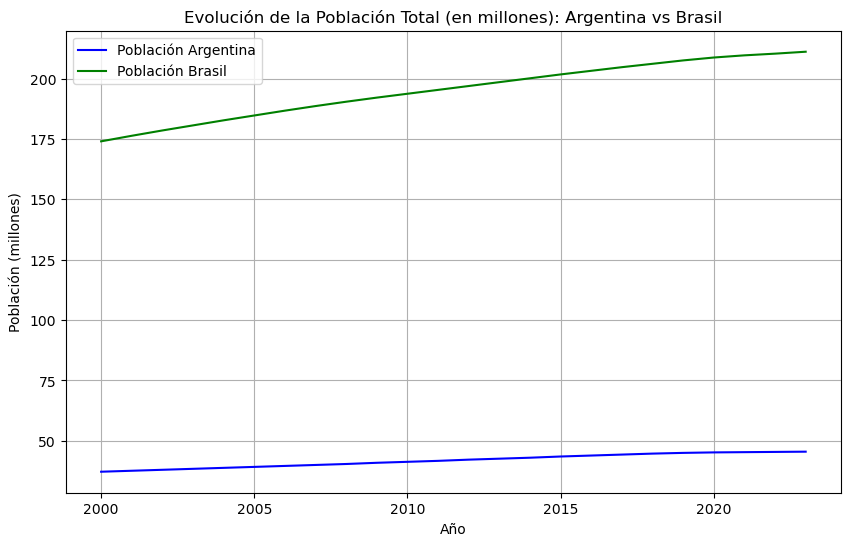

In [68]:
import wbdata
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Definimos los paises
paises = ['ARG', 'BRA']

# Definimos el indicador con el que vamos a trabajar
indicador = {"SP.POP.TOTL": "Población"}

# Definimos el rango de años
fecha_inicio = 2000
fecha_fin = 2023  # Hasta 2023

# Descargamos los datos del Banco Mundial
df = wbdata.get_dataframe(indicador, country=paises)


df.reset_index(inplace=True)


df["date"] = df["date"].astype(int)


df = df[(df["date"] >= fecha_inicio) & (df["date"] <= fecha_fin)]

# Reorganizar los datos para que cada país tenga su propia columna
df_pivot = df.pivot(index="date", columns="country", values="Población")

# Convertir población a millones y redondear
df_pivot = df_pivot / 1_000_000  # Convertimos a millones
df_pivot = df_pivot.round(1)  # Redondeamos a un decimal


plt.figure(figsize=(10, 6))
plt.plot(df_pivot.index, df_pivot["Argentina"], label="Población Argentina", color="blue")
plt.plot(df_pivot.index, df_pivot["Brazil"], label="Población Brasil", color="green")


plt.title("Evolución de la Población Total (en millones): Argentina vs Brasil")
plt.xlabel("Año")
plt.ylabel("Población (millones)")
plt.legend()
plt.grid(True)


plt.show()


In [ ]:
# Resolver acá estilo orientado-objetos 
# Tip: aprovechar este estilo de programar una figura para hacerlo más lindo 


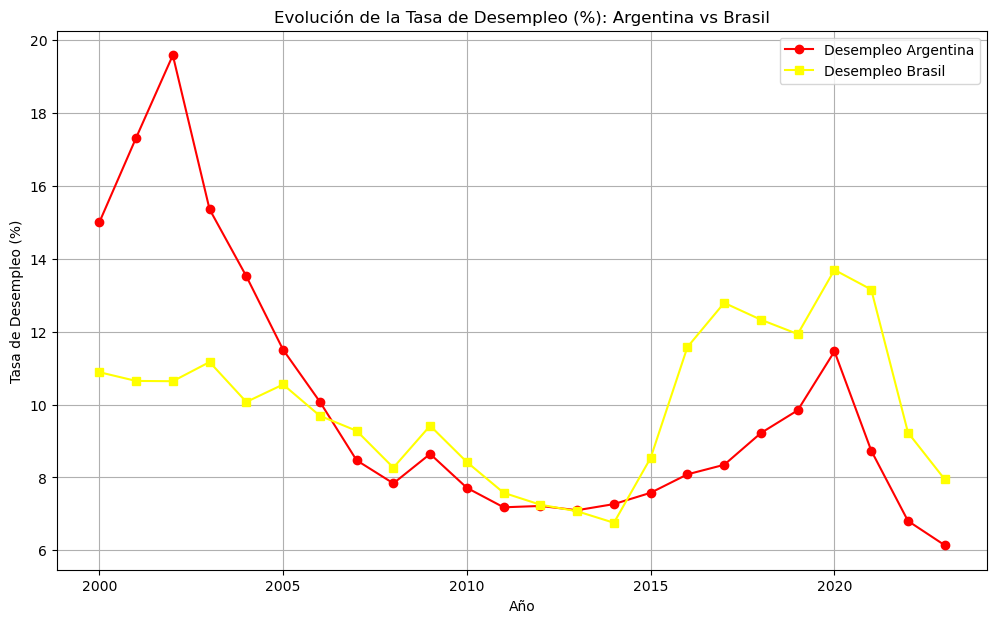

In [13]:
import wbdata
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Definir los países
paises = ['ARG', 'BRA']

# Definir el indicador de tasa de desempleo
indicador = {"SL.UEM.TOTL.ZS": "Desempleo (%)"}

# Definir el rango de años
fecha_inicio = 2000
fecha_fin = 2023  # Hasta 2023

# Descargar datos del Banco Mundial
df = wbdata.get_dataframe(indicador, country=paises)

# Resetear el índice para manejar las fechas
df.reset_index(inplace=True)

# Convertir la columna date a tipo entero (año)
df["date"] = df["date"].astype(int)

# Filtrar solo hasta 2023
df = df[(df["date"] >= fecha_inicio) & (df["date"] <= fecha_fin)]

# Reorganizar los datos para que cada país tenga su propia columna
df_pivot = df.pivot(index="date", columns="country", values="Desempleo (%)")

# Crear la figura y los ejes usando el estilo orientado a objetos
fig, ax = plt.subplots(figsize=(12, 7))

# Graficar los datos
ax.plot(df_pivot.index, df_pivot["Argentina"], label="Desempleo Argentina", color="red", marker="o")
ax.plot(df_pivot.index, df_pivot["Brazil"], label="Desempleo Brasil", color="yellow", marker="s")

# Personalizar ejes y título
ax.set_title("Evolución de la Tasa de Desempleo (%): Argentina vs Brasil")
ax.set_xlabel("Año")
ax.set_ylabel("Tasa de Desempleo (%)")
ax.legend()
ax.grid(True)

# Mostrar gráfico
plt.show()


### Parte B

#### Ejercicio 4
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/) o cualquier diario que les interese, utilicen herramientas de web scraping para obtener los **links** de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Paso 1: Obtener el código HTML de la página web
url = "https://www.lanacion.com.ar/"
response = requests.get(url)

if response.status_code == 200:
    html = response.text
    print("¡Código HTML obtenido con éxito!")
else:
    print(f"Error al obtener el código HTML: {response.status_code}")
    exit()  # Salir del programa si no se pudo obtener el HTML

# Paso 2: Extraer los enlaces de las noticias
soup = BeautifulSoup(html, "html.parser")
links = []

for link in soup.find_all("a"):
    href = link.get("href")
    if href and href.startswith("/"):
        full_link = "https://www.lanacion.com.ar" + href
        links.append(full_link)

print(f"Se encontraron {len(links)} enlaces.")

# Paso 3: Crear un dataframe con los enlaces
df = pd.DataFrame(links, columns=["URL"])
print(df.head())

# Paso 4: Guardar el dataframe en un archivo de Excel
df.to_excel("noticias_lanacion.xlsx", index=False)
print("¡Archivo noticias_lanacion.xlsx creado con éxito!")

# Nota: Recuerda adjuntar una captura de pantalla de la página web al momento de ejecutar el código.


¡Código HTML obtenido con éxito!
Se encontraron 153 enlaces.
                                   URL
0   https://www.lanacion.com.ar/clima/
1         https://www.lanacion.com.ar/
2   https://www.lanacion.com.ar/autos/
3   https://www.lanacion.com.ar/salud/
4  https://www.lanacion.com.ar/juegos/
¡Archivo noticias_lanacion.xlsx creado con éxito!
